# **Python Project**
    Team Members - 
        Swobhineet Swain (2024H1540819P)
        Priyanshu Bansal (2024H1540865P)
        Rohit Kumar (2024H1540833P)
        Yuvraj Singh (2024H1540824P)

# Introduction

The NIFTY50 index is a benchmark stock market index representing the top 50 companies listed on the National Stock Exchange (NSE) of India. This project aims to analyze historical data of the NIFTY50 index from 2000 to 2021, with the goal of deriving meaningful insights about market trends, volatility, and the performance of key sectors over time.

### **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

import os

# Data Importing and Cleaning

## *Data Importing*

In [3]:
#loading the given pre-combined data
nifty_all_pre = pd.read_csv(r"C:\Users\Dell\PycharmProjects\RRA_Analysis\NIFTY50_all.csv")
nifty_all_pre

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [5]:
#loading the stock metadata
stock_metadata = pd.read_csv(r"C:\Users\Dell\PycharmProjects\RRA_Analysis\stock_metadata.csv")
stock_metadata.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018


In [9]:
#Importing Each dataset (to analyze each stock data)

csv_directory = (r"C:\Users\Dell\PycharmProjects\RRA_Analysis\stock_market")
csv_data = {}

for file_name in os.listdir(csv_directory):
    if file_name.endswith(".csv"):
        var_name = os.path.splitext(file_name)[0].replace(" ", "_").replace("-", "_")
        file_path = os.path.join(csv_directory, file_name)
        csv_data[var_name] = pd.read_csv(file_path)

csv_data.keys() #This dictionary will act as an array of tickers for the given companies.

dict_keys(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ_AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFRATEL', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'MARUTI', 'MM', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UPL', 'VEDL', 'WIPRO', 'ZEEL'])

Making a loop to check each stock dataset

In [10]:
# Choose a DataFrame by its key
df_name = ("ASIANPAINT")  # Replace with the actual file name key
if df_name in csv_data:
    df = csv_data[df_name] 
    #(code for changes .... HERE)
    csv_data[df_name] = df
else:
    print(f"DataFrame '{df_name}' not found in the dictionary.")


df.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN


The dataset contains 235,192 rows and 15 columns, providing data about NIFTY 50 stocks over time. Here's a summary of the structure:
Columns:
1.	Date: Dates of the observations (object type).
2.	Symbol: Stock ticker symbols (object type).
3.	Series: Series type (e.g., equity - "EQ") (object type).
4.	Prev Close: Previous closing price (float).
5.	Open: Opening price (float).
6.	High: Highest price of the day (float).
7.	Low: Lowest price of the day (float).
8.	Last: Last traded price (float).
9.	Close: Closing price (float).
10.	VWAP: Volume Weighted Average Price (float).
11.	Volume: Number of shares traded (integer).
12.	Turnover: Turnover in value (float).
13.	Trades: Number of trades (float, with missing values).
14.	Deliverable Volume: Shares deliverable to clients (float, with missing values).
15.	%Deliverable: Percentage of deliverable shares (float, with missing values).


## *Data Cleaning*

In [11]:
nifty_all_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [12]:
#checking for nulls in each column
nifty_all_pre.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

In [13]:
#checking the datatypes for each column
nifty_all_pre.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

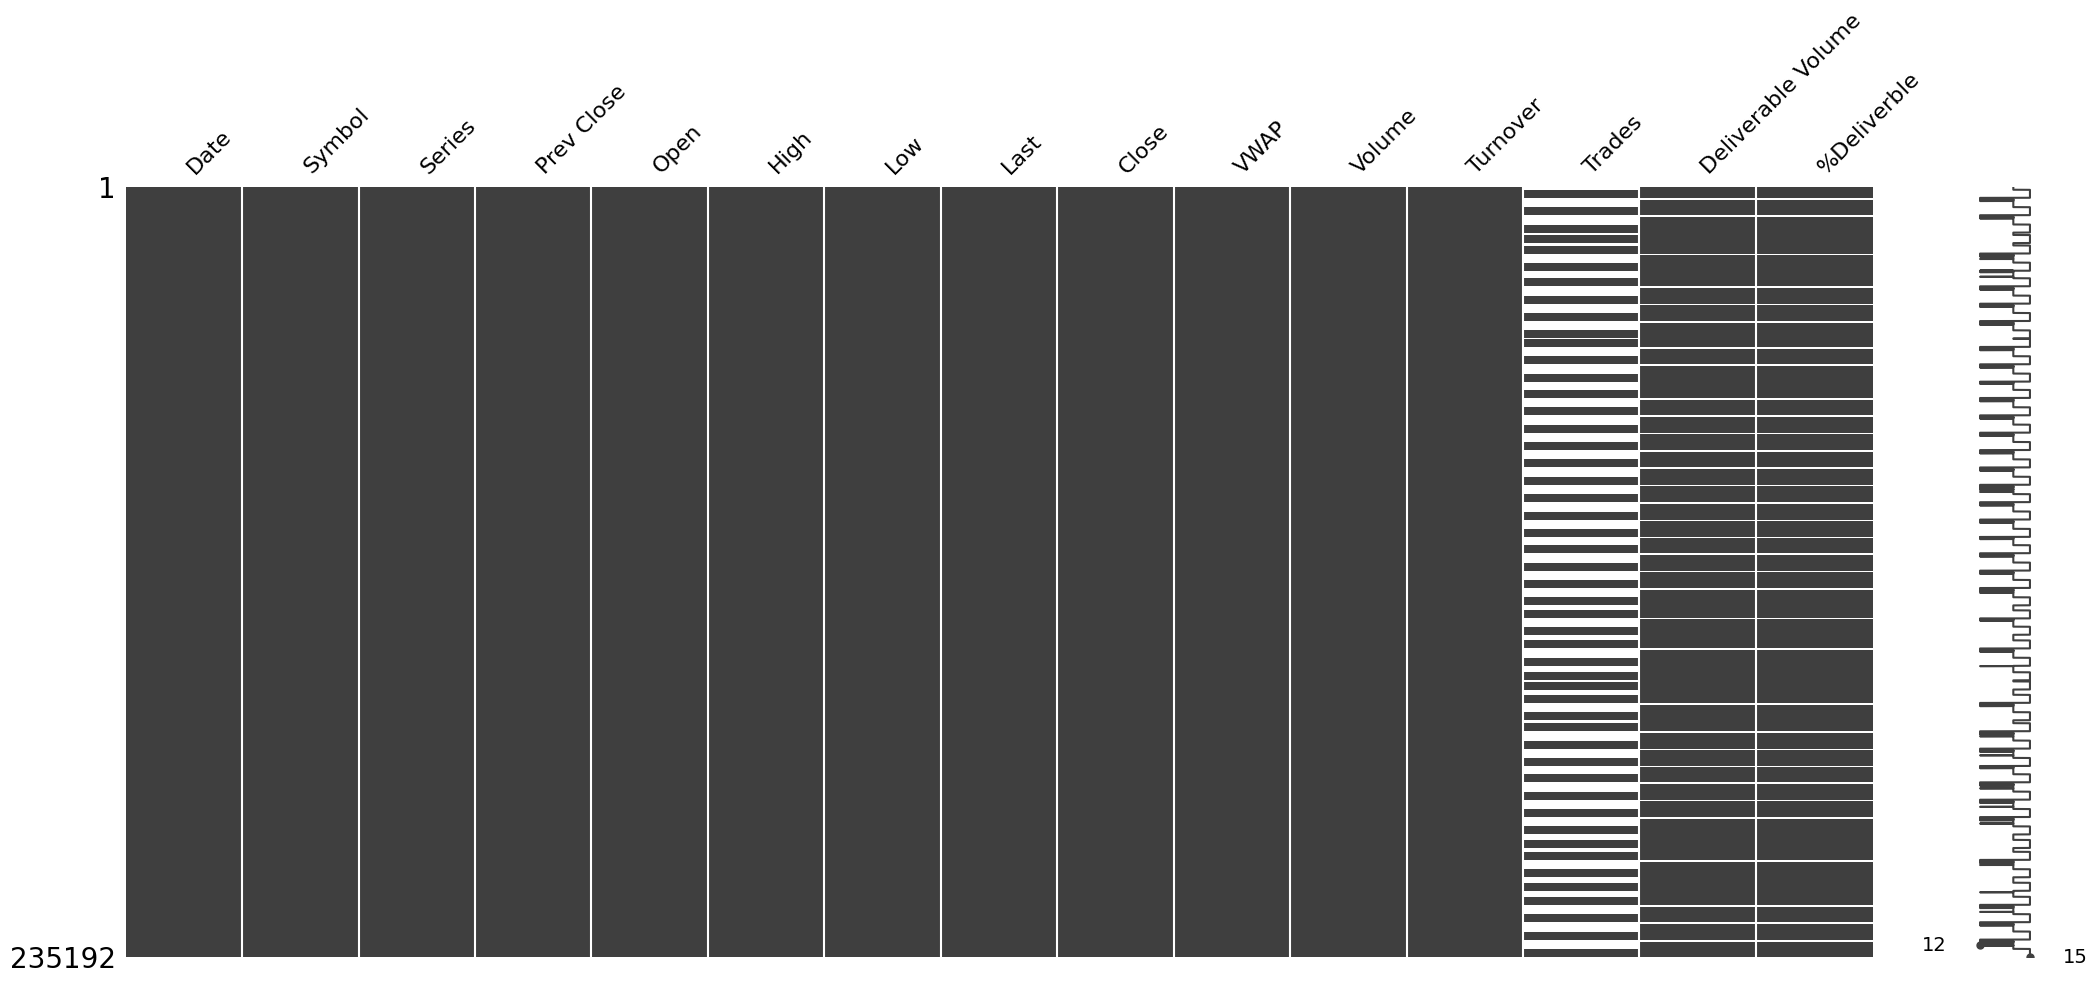

In [14]:
#Visualizing the position of null values
msno.matrix(nifty_all_pre)
plt.show()

In [15]:
#printing the position of null values
missing_data = nifty_all_pre[nifty_all_pre.isnull().any(axis=1)]
missing_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232731,2011-05-25,ZEEL,EQ,135.95,136.15,139.70,133.00,137.95,137.35,137.46,2099385,2.885779e+13,NaN,1051299.0,0.5008
232732,2011-05-26,ZEEL,EQ,137.35,138.80,143.20,136.75,138.35,138.10,139.89,4914276,6.874777e+13,NaN,3031206.0,0.6168
232733,2011-05-27,ZEEL,EQ,138.10,139.00,139.75,137.00,139.00,138.75,138.73,2369073,3.286683e+13,NaN,1662276.0,0.7017
232734,2011-05-30,ZEEL,EQ,138.75,139.00,139.00,135.70,135.70,136.15,137.07,846435,1.160244e+13,NaN,611624.0,0.7226


#### Dealing with Null values

Since, all values missing are numerical, they can be filled with zero. They can't be filled with mean value as the distribution is not uniform (bell curve).

In [16]:
#filling the missing values with zero
nifty_all_pre.fillna(0, inplace=True)

In [17]:
nifty_all_pre.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

Some of the tickers of the companies has changed ove the years. We can chage those to the lastest ticker given in the dataset for easier company wise analysis.

#### Ticker Change

In [18]:
#Identifying all the unique tickers
ticker_changes = nifty_all_pre.groupby('Symbol')['Date'].nunique().reset_index()
ticker_changes

,Symbol,Date
0,ADANIPORTS,2299
1,ASIANPAINT,5306
2,AXISBANK,3394
3,BAJAJ-AUTO,3202
4,BAJAJFINSV,3201
...,...,...
60,UTIBANK,1912
61,VEDL,1482
62,WIPRO,5306
63,ZEEL,3510


There are 65 unique tickers. We have been given data set for 50 companies of which 1 is missing. So, 16 tickers have to be changed.

In [19]:
#Making an array for unique tickers
unique_tickers = nifty_all_pre['Symbol'].unique()
unique_tickers

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [20]:
#Comparing the ticker keys from above and unique tickers array for identifying which tickers to be changed.
ticker_tobe_changed = [x for x in unique_tickers if x not in csv_data.keys()]
ticker_tobe_changed

['MUNDRAPORT',
 'UTIBANK',
 'BAJAJ-AUTO',
 'BAJAUTOFIN',
 'BHARTI',
 'HEROHONDA',
 'HINDALC0',
 'HINDLEVER',
 'INFOSYSTCH',
 'JSWSTL',
 'KOTAKMAH',
 'M&M',
 'TELCO',
 'TISCO',
 'UNIPHOS',
 'SESAGOA',
 'SSLT',
 'ZEETELE']

From the above it can inferred that - 

1) Adaniport changed from Mundraport
2) Axisbank changed from Utibank
3) Bajfinance changed from BajAutoFin
4) Bhartiartl changed from Bharti
5) HeroMotoCo changed from HeroHonda
6) Hindalco had some errors of 'Hindalc0'
7) Hindunilvr changed from Hindlever
8) No data is given for Infratel
9) Infy changed from InfoSysTch
10) JSWSteel changed from JSWStl
11) KotakBank changed from KotakMah
12) TataMotors changed from Telco
13) TataSteel changed from Tisco
14) UPL changed from Uniphos
15) VEDL changed from SESAGOA and then from SSLT
16) ZEEL changed from ZeeTele

Checking the dates for ticker changes for companies

In [21]:
#converting the date column to date-time format and finding the dates for the change of tickers
nifty_all_pre['Date'] = pd.to_datetime(nifty_all_pre['Date'])

sorted_data = nifty_all_pre.sort_values(['Symbol', 'Date'])

ticker_analysis = sorted_data.groupby('Symbol')['Date'].agg(['min', 'max']).reset_index()

ticker_analysis

,Symbol,min,max
0,ADANIPORTS,2012-01-17,2021-04-30
1,ASIANPAINT,2000-01-03,2021-04-30
2,AXISBANK,2007-08-16,2021-04-30
3,BAJAJ-AUTO,2008-05-26,2021-04-30
4,BAJAJFINSV,2008-05-26,2021-04-30
...,...,...,...
60,UTIBANK,2000-01-03,2007-08-14
61,VEDL,2015-05-07,2021-04-30
62,WIPRO,2000-01-03,2021-04-30
63,ZEEL,2007-02-28,2021-04-30


In [22]:
#Creating a Ticker Map
ticker_mapping = {
    'MUNDRAPORT': 'ADANIPORTS',     # Adani Ports
    'UTIBANK': 'AXISBANK',          # Axis Bank
    'BAJAUTOFIN': 'BAJFINANCE',     # Bajaj Finance
    'BHARTI': 'BHARTIARTL',         # Bharti Airtel
    'HEROHONDA': 'HEROMOTOCO',      # Hero 
    'HINDALC0': 'HINDALCO',         # Replacing Zero of HondalCo.
    'HINDLEVER': 'HINDUNILVR',      # Hindustan Unilever
    'INFOSYSTCH': 'INFY',           # Infosys
    'JSWSTL': 'JSWSTEEL',           # JSW Steel
    'KOTAKMAH': 'KOTAKBANK',        # Kotak Mahindra Bank
    'TELCO': 'TATAMOTORS',          # Tata Motors
    'TISCO': 'TATASTEEL',           # Tata Steel
    'UNIPHOS': 'UPL',               # UPL
    'SSLT': 'VEDL',                 # Vedanta
    'SESAGOA': 'VEDL',
    'ZEETELE': 'ZEEL'               # Zee Entertainment
}

In [23]:
#Replacing the tickers in ticker map made above
nifty_all_pre['Symbol'] = nifty_all_pre['Symbol'].replace(ticker_mapping)

In [24]:
nifty_all_pre['Symbol'].unique(), nifty_all_pre['Symbol'].nunique()

(array(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV',
        'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA',
        'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH',
        'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR',
        'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL',
        'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC',
        'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA',
        'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
        'UPL', 'VEDL', 'WIPRO', 'ZEEL'], dtype=object),
 49)

Now, the tickers for each company is the same as its latest ticker (as given in the dataset). Total tickers = Toal companies given = 50 - 1(missing) = 49

In [25]:
#cleaned dataset
nifty_all_pre

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,ADANIPORTS,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,0.0,9859619.0,0.3612
1,2007-11-28,ADANIPORTS,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,0.0,1453278.0,0.3172
2,2007-11-29,ADANIPORTS,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,0.0,1069678.0,0.2088
3,2007-11-30,ADANIPORTS,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,0.0,1260913.0,0.2735
4,2007-12-03,ADANIPORTS,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,0.0,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


## *Merging Datasets*

Merging the meta-data and nifty50 data for final dataset for analysis (esp. industry level analysis)

In [26]:
#Merging both datasets using left join on symbol
merged_data = pd.merge(nifty_all_pre, stock_metadata, on='Symbol', how='left')

## *Final Dataset*

In [27]:
merged_data.head()

,Date,Symbol,Series_x,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,Series_y,ISIN Code
0,2007-11-27,ADANIPORTS,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,0.0,9859619.0,0.3612,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
1,2007-11-28,ADANIPORTS,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,0.0,1453278.0,0.3172,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
2,2007-11-29,ADANIPORTS,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,0.0,1069678.0,0.2088,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
3,2007-11-30,ADANIPORTS,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,0.0,1260913.0,0.2735,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
4,2007-12-03,ADANIPORTS,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,0.0,816123.0,0.2741,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042


In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                235192 non-null  datetime64[ns]
 1   Symbol              235192 non-null  object        
 2   Series_x            235192 non-null  object        
 3   Prev Close          235192 non-null  float64       
 4   Open                235192 non-null  float64       
 5   High                235192 non-null  float64       
 6   Low                 235192 non-null  float64       
 7   Last                235192 non-null  float64       
 8   Close               235192 non-null  float64       
 9   VWAP                235192 non-null  float64       
 10  Volume              235192 non-null  int64         
 11  Turnover            235192 non-null  float64       
 12  Trades              235192 non-null  float64       
 13  Deliverable Volume  235192 no

In [29]:
merged_data.isnull().sum()

Date                  0
Symbol                0
Series_x              0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Company Name          0
Industry              0
Series_y              0
ISIN Code             0
dtype: int64

In [30]:
merged_data.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,235192.000000
mean,2011-05-22 13:18:08.975815680,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,3.170613e+04,1.225202e+06,0.468614
min,2000-01-03 00:00:00,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,0.000000e+00,0.000000e+00,0.000000
25%,2006-07-03 00:00:00,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,0.000000e+00,7.775075e+04,0.324000
50%,2011-08-19 00:00:00,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,1.768500e+03,4.261440e+05,0.492000
75%,2016-06-24 00:00:00,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,4.528125e+04,1.336903e+06,0.628400
max,2021-04-30 00:00:00,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000
std,NaN,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,5.806774e+04,2.753250e+06,0.223051


# INSIGHTS

Now that we have the final dataset after importing, cleaning and merging. We can generate **insights** from the final dataset.

## General Decscriptive Statistical Insights

In [31]:
#Descriptive Statistics
merged_data.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,235192.000000
mean,2011-05-22 13:18:08.975815680,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,3.170613e+04,1.225202e+06,0.468614
min,2000-01-03 00:00:00,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,0.000000e+00,0.000000e+00,0.000000
25%,2006-07-03 00:00:00,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,0.000000e+00,7.775075e+04,0.324000
50%,2011-08-19 00:00:00,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,1.768500e+03,4.261440e+05,0.492000
75%,2016-06-24 00:00:00,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,4.528125e+04,1.336903e+06,0.628400
max,2021-04-30 00:00:00,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000
std,NaN,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,5.806774e+04,2.753250e+06,0.223051


Following can be inferred from the final dataset - **{merged_data.describe()}**

1. **Missing Values**:
   - **Trades**: There were 114,848 missing entries (49%). Not anymore after cleaning.
   - **Deliverable Volume** and **%Deliverable**: Had 16,077 (7%) missing entries each. Not anymore after cleaning.

2. **Shape**:
   - There are **2,35,192** rows.
   - There are **19** columns.

3. **Opening Price Statistics**:
   - Median Opening price: ₹567.025.
   - Maximum Opening price: ₹33,399.95, indicating significant price variance among stocks.

4. **Closing Price Statistics**:
   - Median closing price: ₹566.7.
   - Maximum closing price: ₹32,861.95, indicating significant price variance among stocks.

5. **Trading Volume Distribution**:
   - Median daily trading volume per stock is ~1 million shares.
   - The highest recorded daily volume is ~481 million shares.

6. **Turnover Insights**:
   - Median turnover per day is ~₹68 billion.
   - Maximum turnover: ₹35.6 trillion, indicating a few high-value trading days.


More can be inferred for each numerical column in the dataset from the above code.

## Insights on Trends Over Time

In [32]:
# Grouping data by date to analyze trends over time
time_series = merged_data.groupby('Date').agg({'Close': 'mean', 'Volume': 'sum', 'Turnover': 'sum'}).reset_index()
time_series

,Date,Close,Volume,Turnover
0,2000-01-03,1046.295455,12398454,4.397286e+14
1,2000-01-04,1096.909091,23527330,1.177601e+15
2,2000-01-05,1047.637879,47966946,2.495488e+15
3,2000-01-06,1019.443939,35021797,1.625151e+15
4,2000-01-07,971.904545,36313881,1.165253e+15
...,...,...,...,...
5301,2021-04-26,2537.928571,470421224,3.286953e+16
5302,2021-04-27,2551.491837,468081369,3.159695e+16
5303,2021-04-28,2588.959184,472093359,3.715832e+16
5304,2021-04-29,2599.134694,546674619,4.171056e+16


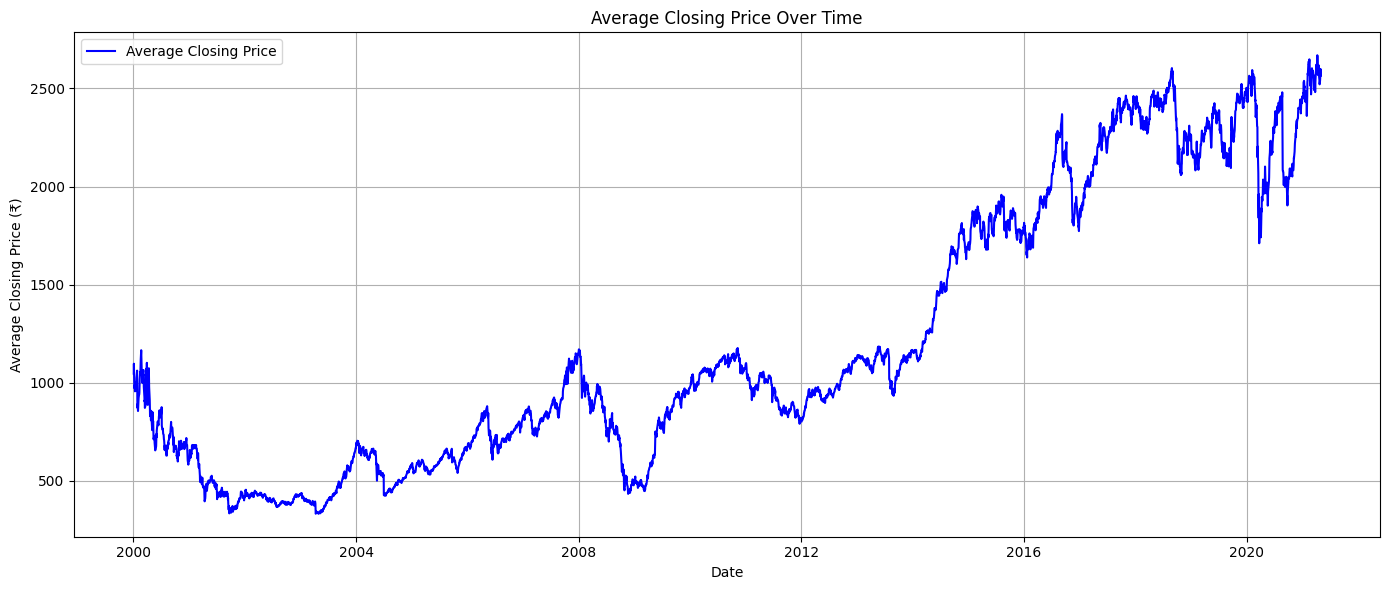

In [33]:
# Plotting trends for average closing price over time
plt.figure(figsize=(14, 6))
plt.plot(time_series['Date'], time_series['Close'], color='blue', label='Average Closing Price')
plt.title("Average Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Closing Price (₹)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

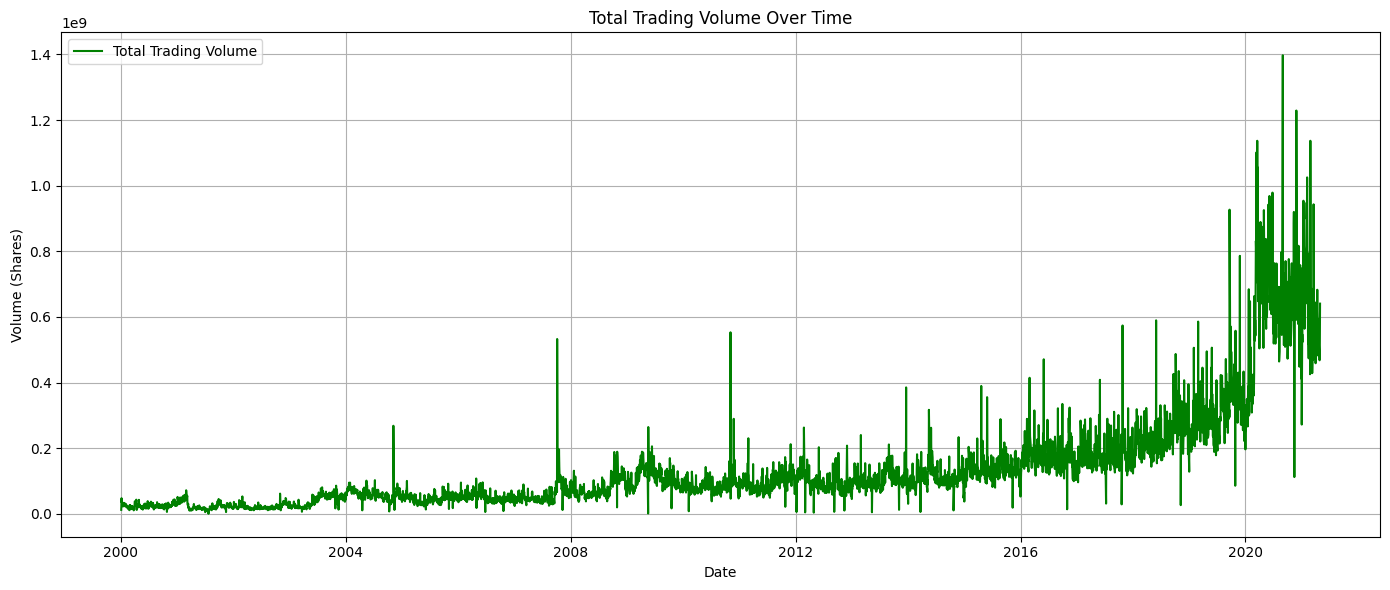

In [34]:
# Plotting trends for total trading volume over time
plt.figure(figsize=(14, 6))
plt.plot(time_series['Date'], time_series['Volume'], color='green', label='Total Trading Volume')
plt.title("Total Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume (Shares)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

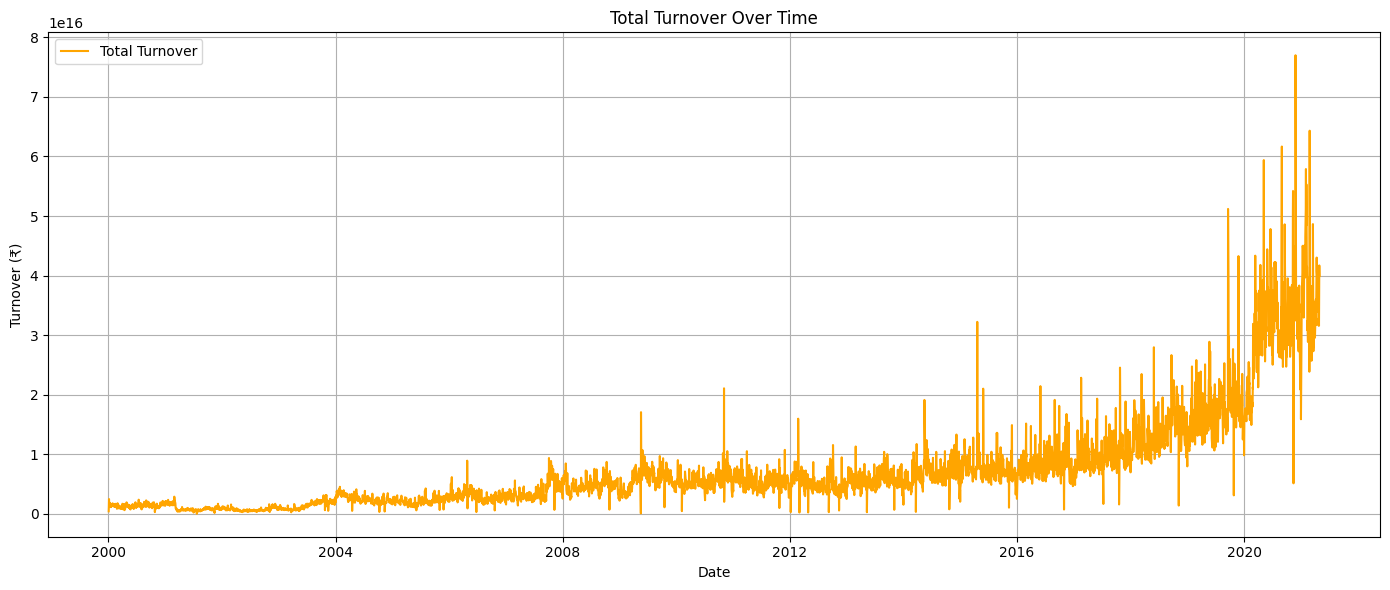

In [35]:
# Plotting trends for total turnover over time
plt.figure(figsize=(14, 6))
plt.plot(time_series['Date'], time_series['Turnover'], color='orange', label='Total Turnover')
plt.title("Total Turnover Over Time")
plt.xlabel("Date")
plt.ylabel("Turnover (₹)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Insights:

    Overall a bullish market with some dips in the following years:
        1. 2001-2003
            Most Probably because of 9/11, Global War on Terror and Fluctuation in global gas(petrol) prices.
        2. 2008
            Most Probably because of the Global Financial Crisis.
        3. Late 2016 and Early 2017
            Most Probably because of Demonitizations and implementation of GST by the Indian government.
        4. 2020
            Most probably due to the COVID-19 Pandemic.

    Despite these dips the market has overall been positve/upward/bullish.

## Correlation between the price metrics

In [36]:
# Calculate correlations between numerical columns of interest
correlation_matrix = merged_data[['Volume', 'Turnover', 'Close', 'Open', 'High', 'Low']].corr()
correlation_matrix

,Volume,Turnover,Close,Open,High,Low
Volume,1.000000,0.629582,-0.118705,-0.118779,-0.118595,-0.118914
Turnover,0.629582,1.000000,0.053106,0.052704,0.053697,0.052144
Close,-0.118705,0.053106,1.000000,0.999761,0.999892,0.999878
Open,-0.118779,0.052704,0.999761,1.000000,0.999857,0.999863
High,-0.118595,0.053697,0.999892,0.999857,1.000000,0.999790
Low,-0.118914,0.052144,0.999878,0.999863,0.999790,1.000000


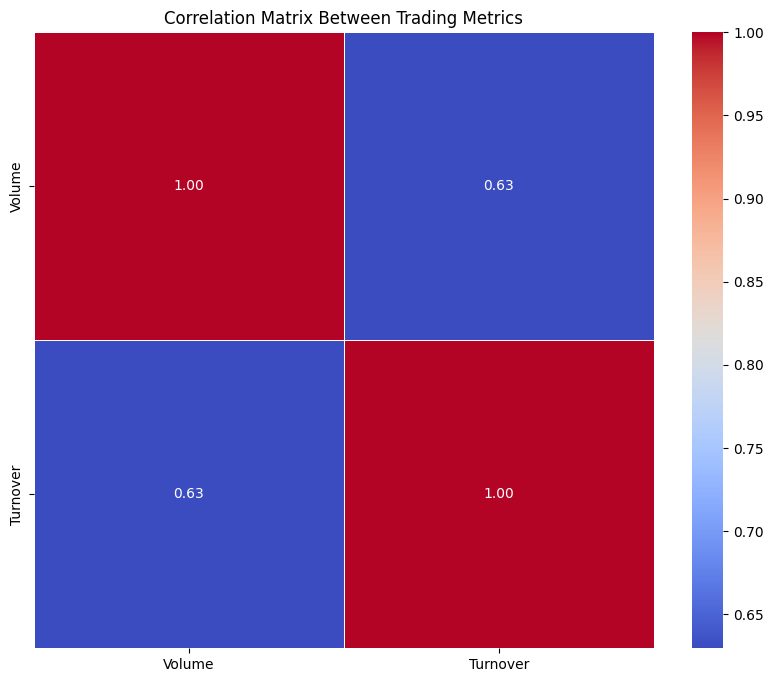

In [37]:
# Calculate correlations between Volume and Turnover
correlation_matrix = merged_data[['Volume', 'Turnover']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Between Trading Metrics")
plt.show()


The correlation matix and heatmap provides insights into the relationships between various trading metrics.

    Observations:

        Strong Correlations:


        Open, High, Low, and Close:
        -These metrics have a almost perfect positive correlation (correlation = 1.00).
        -This is expected, as these price metrics are derived from the same stock movements during the trading day.
        
        Volume and Turnover:
        -A positive correlation of 0.63 between Volume and Turnover suggests that higher traded volumes generally result in higher turnover, though the relationship is not perfectly linear.


        Weak Correlations with Price Metrics:


        Volume vs. Open, High, Low, Close:
        -Negative correlations (~-0.12) indicate that price movements are not strongly tied to trading volume.
        This could suggest that trading activity (volume) is influenced by other factors, such as market sentiment or external news, rather than just price levels.

        Turnover vs. Open, High, Low, Close:
        Near-zero correlations (~0.05) show that turnover does not strongly depend on individual price points but is more aligned with volume.



    Insights for Investors:
        
        Volume and Turnover:
        Investors should monitor both volume and turnover as complementary indicators of market activity. Turnover provides a monetary measure, while volume shows activity levels in terms of traded shares.

        Price Independence from Volume:
        The weak correlation between volume and price suggests that price movements are not always driven by trading activity.
        Price may be more influenced by broader market trends, economic events, or company-specific news rather than sheer trading activity.

        Key Trading Metrics:
        Since Open, High, Low, and Close are perfectly correlated, analyzing any one of them (e.g., Close) should suffice for price trend analysis.

        Strategic Analysis:
        - For high-frequency trading or day trading, Volume and Turnover may provide better signals than price levels alone.
        - For long-term investors, price trends (e.g., closing prices) remain more relevant for identifying overall market sentiment.



## Company - Level Insights

In [38]:
# Grouping by stock symbol and calculating the percentage change
profitability = merged_data.groupby('Symbol').agg(first_open=('Open', 'first'), last_close=('Close', 'last'))
profitability['percentage_change'] = ((profitability['last_close'] - profitability['first_open']) / profitability['first_open']) * 100

# Sorting by percentage change to find the most profitable stocks
most_profitable_stocks = profitability.sort_values(by='percentage_change', ascending=False).head(10)

most_profitable_stocks

,first_open,last_close,percentage_change
Symbol,,,
SHREECEM,68.00,27910.50,40944.852941
BAJFINANCE,49.45,5451.90,10925.075834
EICHERMOT,48.00,2421.65,4945.104167
MARUTI,164.90,6455.65,3814.887811
INDUSINDBK,28.90,934.95,3135.121107
AXISBANK,26.70,714.90,2577.528090
ULTRACEMCO,305.00,6278.95,1958.672131
BAJAJFINSV,600.00,11041.65,1740.275000
BHARTIARTL,51.90,536.75,934.200385


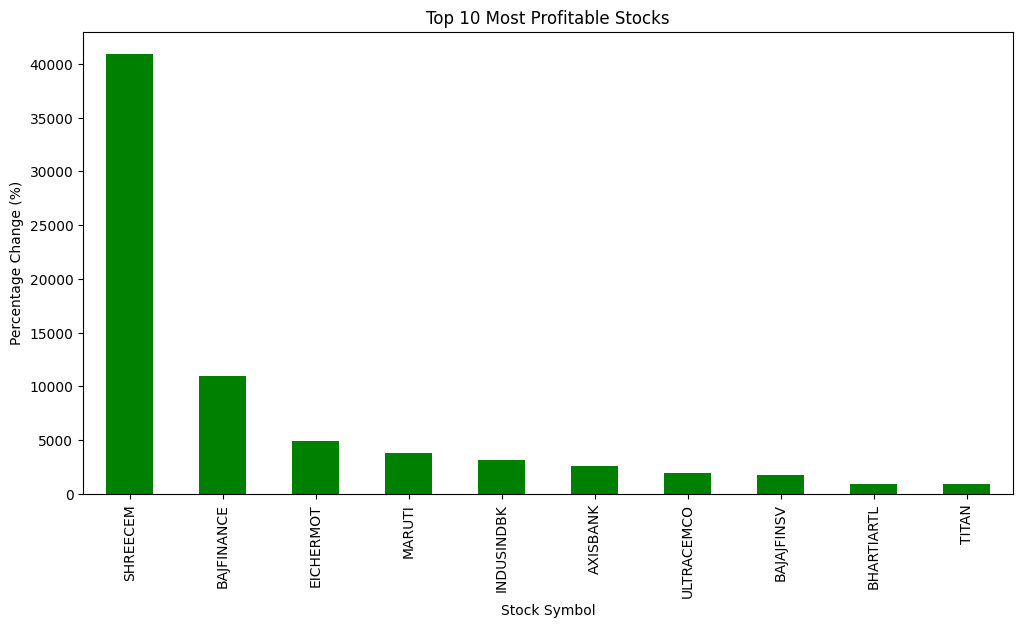

In [39]:
#Visualization
plt.figure(figsize=(12, 6))
most_profitable_stocks['percentage_change'].plot(kind='bar', color='green')
plt.title("Top 10 Most Profitable Stocks")
plt.ylabel("Percentage Change (%)")
plt.xlabel("Stock Symbol")
plt.show()

In [40]:
# Making a new column for daily price range for each stock (as a measure of volatility)
merged_data['price_range'] = merged_data['High'] - merged_data['Low']

volatility_data = merged_data.groupby('Symbol')['price_range'].mean().reset_index()
most_volatile_stocks = volatility_data.sort_values(by='price_range', ascending=False).head(10)
most_volatile_stocks

,Symbol,price_range
37,SHREECEM,215.625165
12,EICHERMOT,198.763714
31,NESTLEIND,179.485175
23,INFY,87.139295
4,BAJAJFINSV,86.883005
30,MARUTI,73.790366
44,ULTRACEMCO,60.879698
3,BAJAJ-AUTO,57.719300
14,GRASIM,52.887222
11,DRREDDY,52.041227


C:\Users\Dell\AppData\Local\Temp\ipykernel_9632\3075403702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Symbol', y='price_range', data=most_volatile_stocks, palette='viridis')


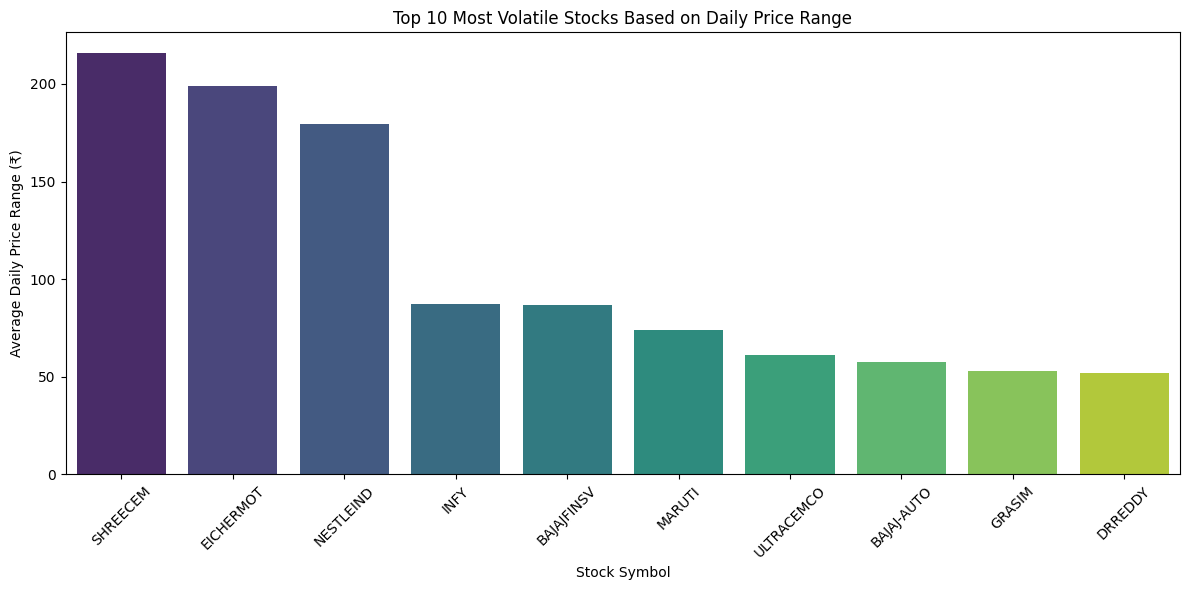

In [41]:
# Visualization of the most volatile stocks
plt.figure(figsize=(12, 6))
sns.barplot(x='Symbol', y='price_range', data=most_volatile_stocks, palette='viridis')
plt.title("Top 10 Most Volatile Stocks Based on Daily Price Range")
plt.xlabel("Stock Symbol")
plt.ylabel("Average Daily Price Range (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Making a new column for turnover-to-volume ratio for each stock
merged_data['turnover_to_volume_ratio'] = merged_data['Turnover'] / merged_data['Volume']

liquidity_data = merged_data.groupby('Symbol')['turnover_to_volume_ratio'].mean().reset_index()
most_liquid_stocks = liquidity_data.sort_values(by='turnover_to_volume_ratio', ascending=False).head(10)
most_liquid_stocks

,Symbol,turnover_to_volume_ratio
31,NESTLEIND,7.514319e+08
12,EICHERMOT,6.754186e+08
37,SHREECEM,6.565084e+08
30,MARUTI,2.926481e+08
4,BAJAJFINSV,2.761157e+08
23,INFY,2.582750e+08
3,BAJAJ-AUTO,2.191294e+08
44,ULTRACEMCO,2.151960e+08
11,DRREDDY,1.829621e+08
14,GRASIM,1.753952e+08


C:\Users\Dell\AppData\Local\Temp\ipykernel_9632\3526194231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Symbol', y='turnover_to_volume_ratio', data=most_liquid_stocks, palette='coolwarm')


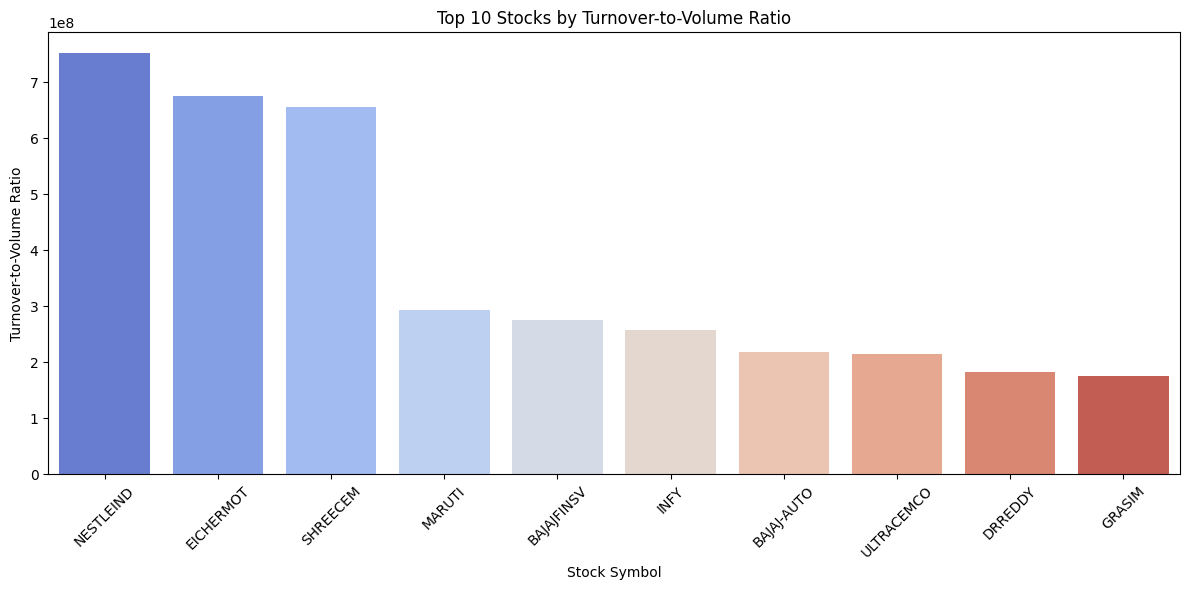

In [43]:
# Visualization of the most liquid stocks
plt.figure(figsize=(12, 6))
sns.barplot(x='Symbol', y='turnover_to_volume_ratio', data=most_liquid_stocks, palette='coolwarm')
plt.title("Top 10 Stocks by Turnover-to-Volume Ratio")
plt.xlabel("Stock Symbol")
plt.ylabel("Turnover-to-Volume Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
#Highest delivery %s
delivery_data = merged_data.groupby('Symbol')['%Deliverble'].mean().reset_index()
highest_delivery_stocks = delivery_data.sort_values(by='%Deliverble', ascending=False).head(10)
highest_delivery_stocks

,Symbol,%Deliverble
31,NESTLEIND,0.662074
37,SHREECEM,0.656606
44,ULTRACEMCO,0.601918
34,POWERGRID,0.591903
16,HDFC,0.590438
32,NTPC,0.587853
8,BRITANNIA,0.582683
5,BAJFINANCE,0.574369
1,ASIANPAINT,0.565562
45,UPL,0.557720


C:\Users\Dell\AppData\Local\Temp\ipykernel_9632\686277745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Symbol', y='%Deliverble', data=highest_delivery_stocks, palette='Blues_d')


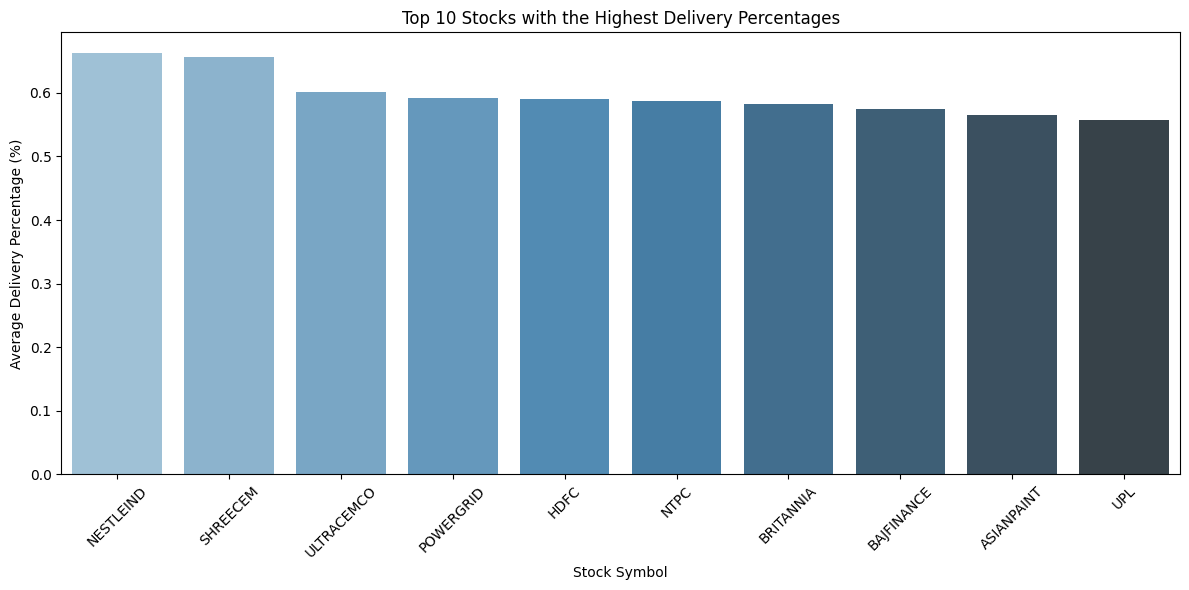

In [45]:
# Visualization of stocks with the highest delivery percentages
plt.figure(figsize=(12, 6))
sns.barplot(x='Symbol', y='%Deliverble', data=highest_delivery_stocks, palette='Blues_d')
plt.title("Top 10 Stocks with the Highest Delivery Percentages")
plt.xlabel("Stock Symbol")
plt.ylabel("Average Delivery Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
#Highest Return Stocks
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
data = merged_data.sort_values(by=['Symbol', 'Date'])

# Making a new column for daily return as a percentage change in Close prices
data['Return'] = data.groupby('Symbol')['Close'].pct_change() * 100
return_data = data.groupby('Symbol')['Return'].mean().reset_index()
return_data.head()

,Symbol,Return
0,ADANIPORTS,0.052568
1,ASIANPAINT,0.080446
2,AXISBANK,0.117750
3,BAJAJ-AUTO,0.082717
4,BAJAJFINSV,0.128234


In [47]:
return_data.describe()

,Return
count,49.000000
mean,0.068592
std,0.037471
min,-0.018754
25%,0.046054
50%,0.061376
75%,0.093180
max,0.154723


The Return column has the following characteristics:

    Statistics:
        Mean return: ~7%
        Standard deviation: 3.74%
        Minimum return: -1.8%
        Maximum return: 15.4%
        Median return: ~6%

In [70]:
highest_retun_stocks = return_data.sort_values(by='Return', ascending=False).head(10)
highest_retun_stocks

,Symbol,Return
5,BAJFINANCE,0.154723
37,SHREECEM,0.151705
12,EICHERMOT,0.137714
4,BAJAJFINSV,0.128234
22,INDUSINDBK,0.122159
43,TITAN,0.120641
2,AXISBANK,0.117750
46,VEDL,0.109149
30,MARUTI,0.106520
27,KOTAKBANK,0.103002


C:\Users\Swobhineet Swain\AppData\Local\Temp\ipykernel_24124\1742023006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Symbol', y='Return', data=highest_retun_stocks, palette='viridis')


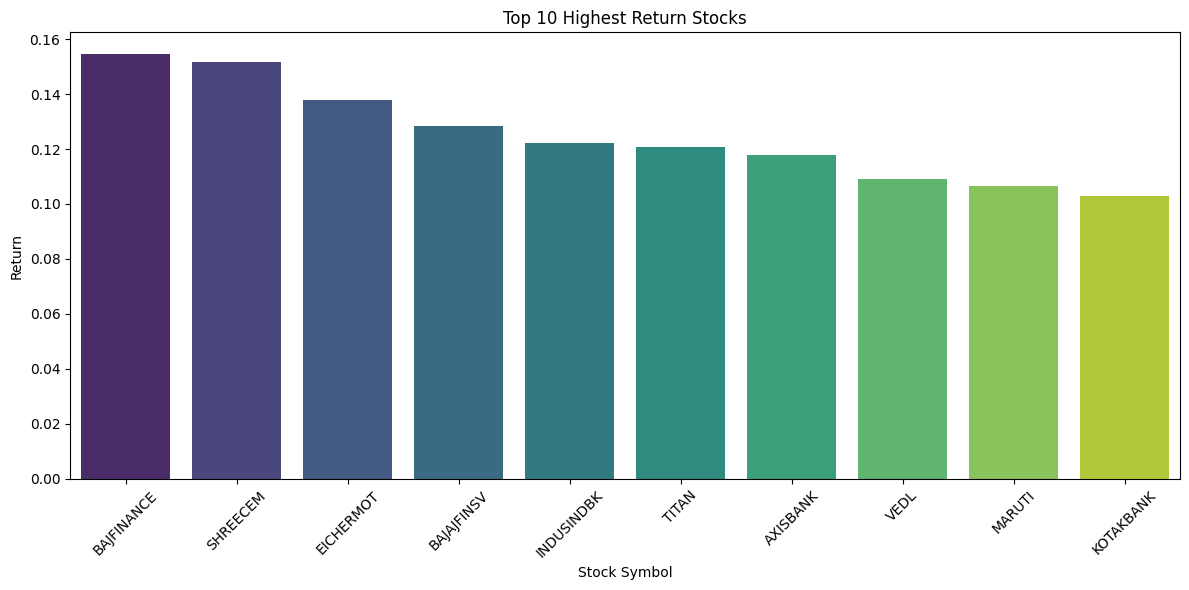

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Symbol', y='Return', data=highest_retun_stocks, palette='viridis')
plt.title("Top 10 Highest Return Stocks")
plt.xlabel("Stock Symbol")
plt.ylabel("Return")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sector - Level Insights

In [48]:
# Filter data by date range
data['Date'] = pd.to_datetime(data['Date'])
filtered_data = data[(data['Date'] >= '2000-01-01') & (data['Date'] <= '2021-12-31')]

In [49]:
filtered_data = filtered_data.dropna(subset=['Return', 'Industry'])

In [50]:
#Define Economic Phases
economic_phases = {
    "Dot-com Bubble Burst": ("2000-01-01", "2002-12-31"),
    "Pre-2008 Financial Crisis": ("2003-01-01", "2007-12-31"),
    "2008 Financial Crisis": ("2008-01-01", "2009-12-31"),
    "Post-Crisis Recovery": ("2010-01-01", "2019-12-31"),
    "COVID-19 Pandemic": ("2020-01-01", "2021-12-31")
}

In [51]:
#Aggregate Sector Returns and Risk
sector_analysis = []

for phase, (start_date, end_date) in economic_phases.items():
    phase_data = filtered_data[(filtered_data['Date'] >= start_date) & (filtered_data['Date'] <= end_date)]
    sector_stats = phase_data.groupby('Industry').agg(
        Average_Return=('Return', 'mean'),
        Volatility=('Return', 'std')
    ).reset_index()
    sector_stats['Phase'] = phase
    sector_analysis.append(sector_stats)

sector_analysis = pd.concat(sector_analysis, ignore_index=True)

In [52]:
# Normalize returns and risks to assess contribution (if needed)
sector_analysis['Normalized_Return'] = sector_analysis.groupby('Phase')['Average_Return'].transform(
    lambda x: x / x.sum()
)
sector_analysis['Normalized_Risk'] = sector_analysis.groupby('Phase')['Volatility'].transform(
    lambda x: x / x.sum()
)

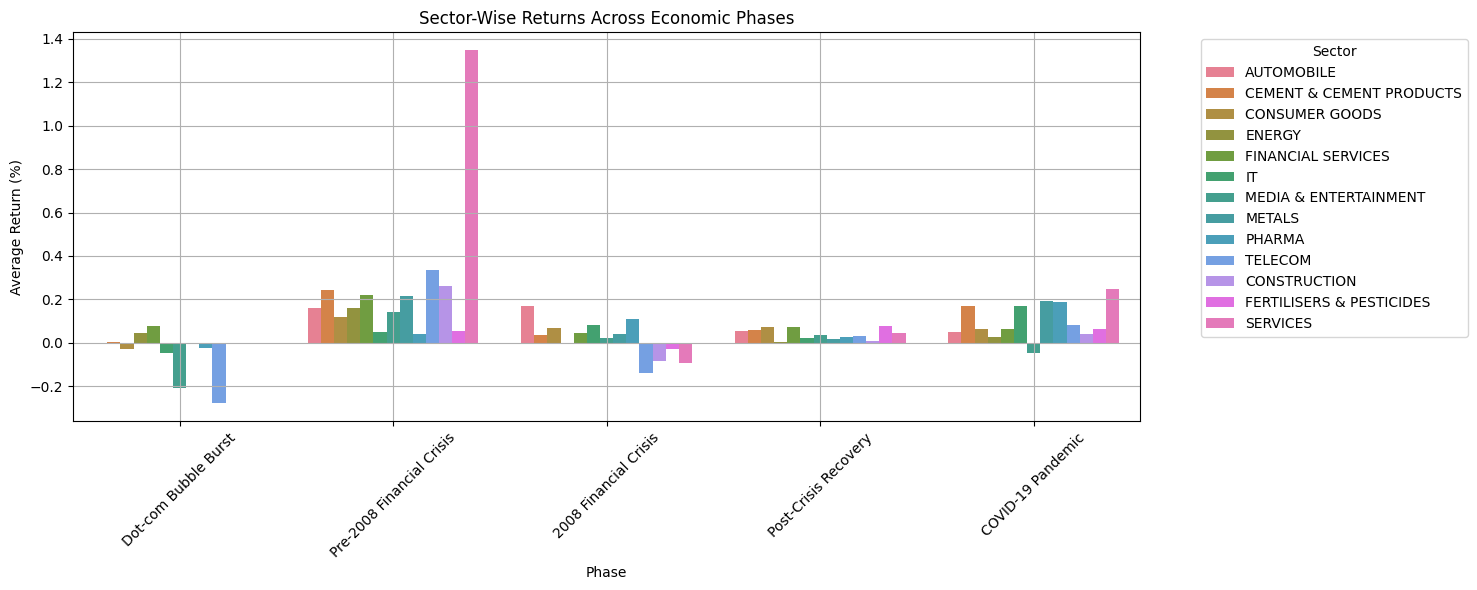

In [53]:
# Plot sector performance across phases
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sector_analysis, 
    x='Phase', 
    y='Average_Return', 
    hue='Industry'
)
plt.title("Sector-Wise Returns Across Economic Phases")
plt.ylabel("Average Return (%)")
plt.xticks(rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid()
plt.show()

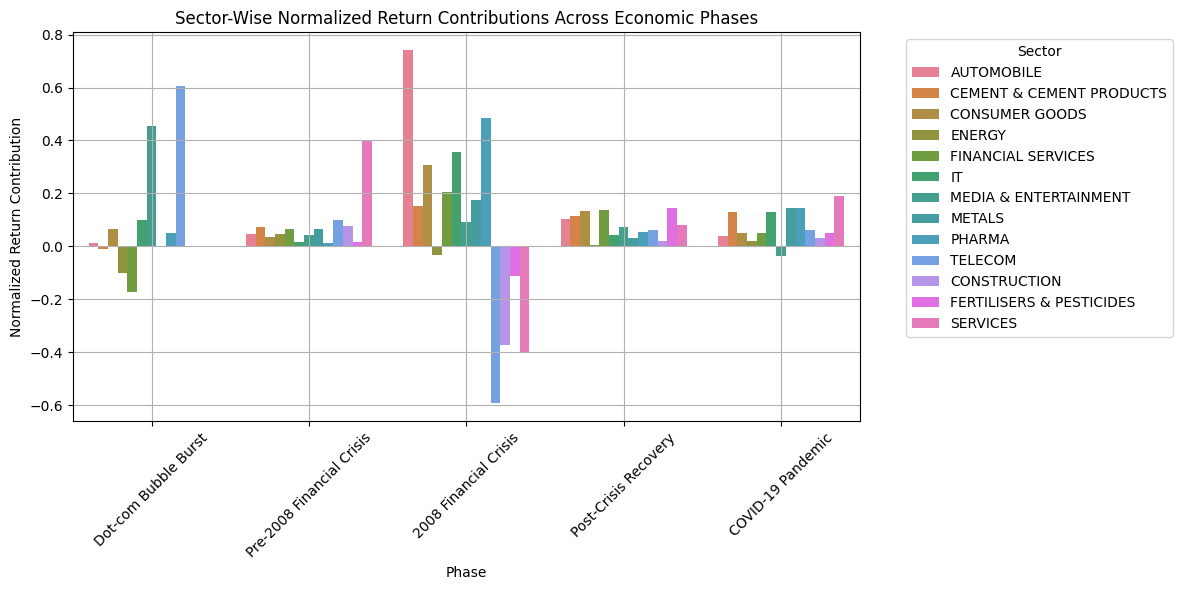

In [65]:
# Plot Normalized Return contributions
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sector_analysis, 
    x='Phase', 
    y='Normalized_Return', 
    hue='Industry'
)
plt.title("Sector-Wise Normalized Return Contributions Across Economic Phases")
plt.ylabel("Normalized Return Contribution")
plt.xticks(rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid()
plt.show()

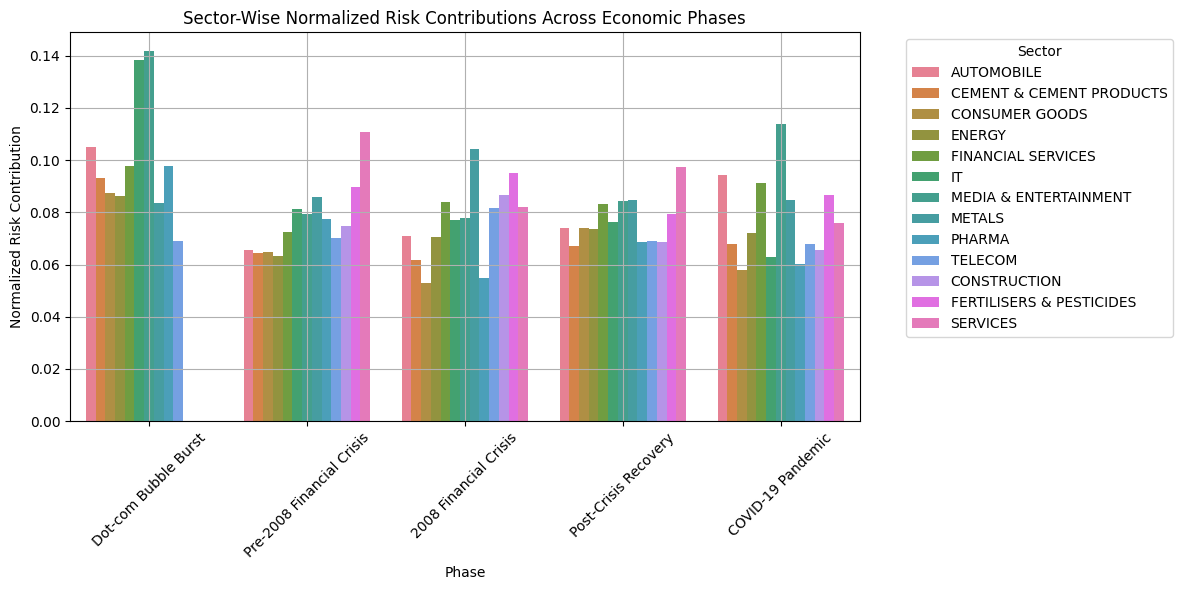

In [64]:
# Plot Normalized Risk contributions
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sector_analysis, 
    x='Phase', 
    y='Normalized_Risk', 
    hue='Industry'
)
plt.title("Sector-Wise Normalized Risk Contributions Across Economic Phases")
plt.ylabel("Normalized Risk Contribution")
plt.xticks(rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid()
plt.show()

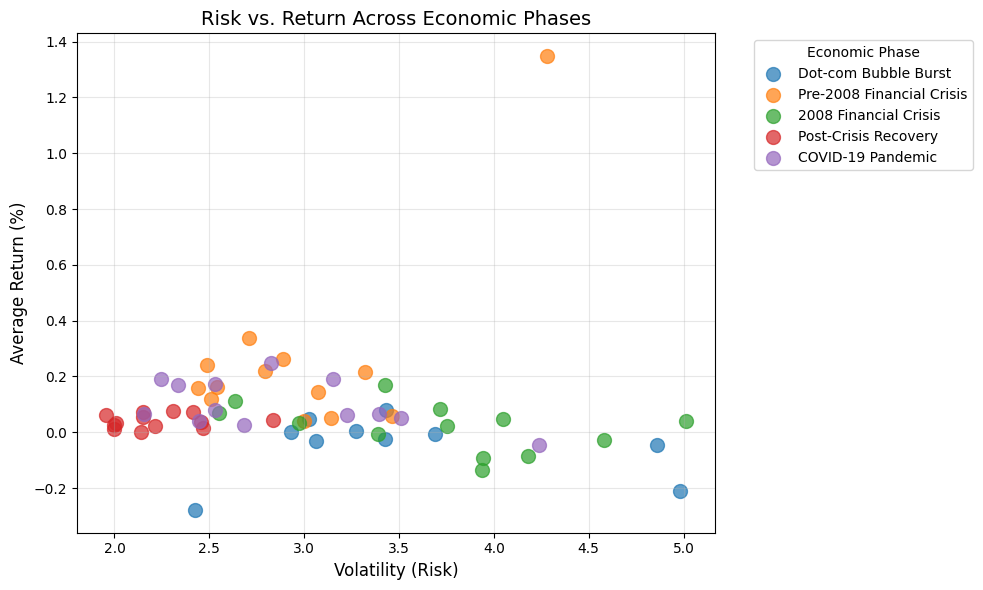

In [56]:
# Scatter Plot of Risk vs. Return for Each Economic Phase
plt.figure(figsize=(10, 6))

# Create a scatter plot for each phase
for phase in economic_phases.keys():
    phase_data = sector_analysis[sector_analysis['Phase'] == phase]
    plt.scatter(
        phase_data['Volatility'], 
        phase_data['Average_Return'], 
        label=phase, 
        s=100,  # marker size
        alpha=0.7  # transparency
    )

# Add labels and legends
plt.title("Risk vs. Return Across Economic Phases", fontsize=14)
plt.xlabel("Volatility (Risk)", fontsize=12)
plt.ylabel("Average Return (%)", fontsize=12)
plt.legend(title="Economic Phase", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

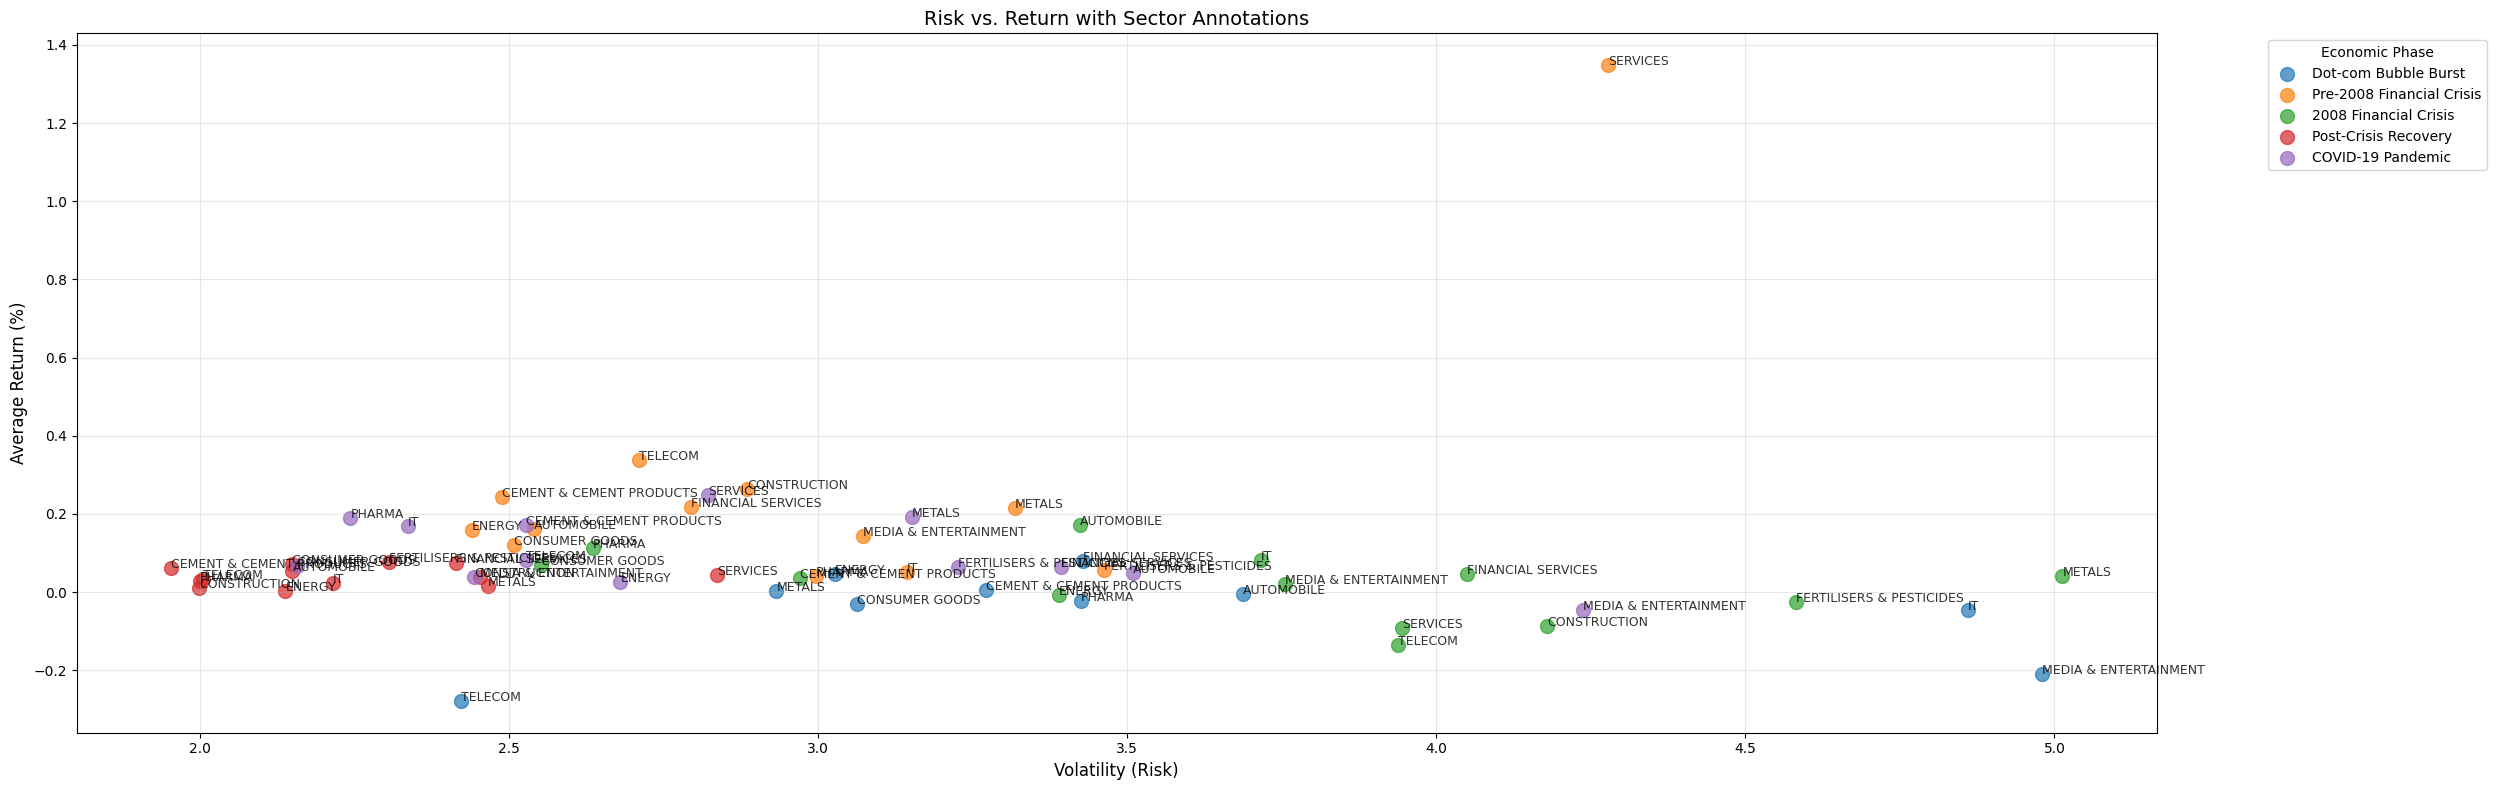

In [57]:
#Enhanced Scatter Plot with Sector Annotations
plt.figure(figsize=(25, 8))

# Plot scatter points
for phase in economic_phases.keys():
    phase_data = sector_analysis[sector_analysis['Phase'] == phase]
    plt.scatter(
        phase_data['Volatility'], 
        phase_data['Average_Return'], 
        label=phase, 
        s=100, 
        alpha=0.7
    )
    # Annotate points with sector names
    for _, row in phase_data.iterrows():
        plt.text(
            row['Volatility'], 
            row['Average_Return'], 
            row['Industry'], 
            fontsize=9, 
            alpha=0.8
        )

# Add labels and legends
plt.title("Risk vs. Return with Sector Annotations", fontsize=14)
plt.xlabel("Volatility (Risk)", fontsize=12)
plt.ylabel("Average Return (%)", fontsize=12)
plt.legend(title="Economic Phase", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


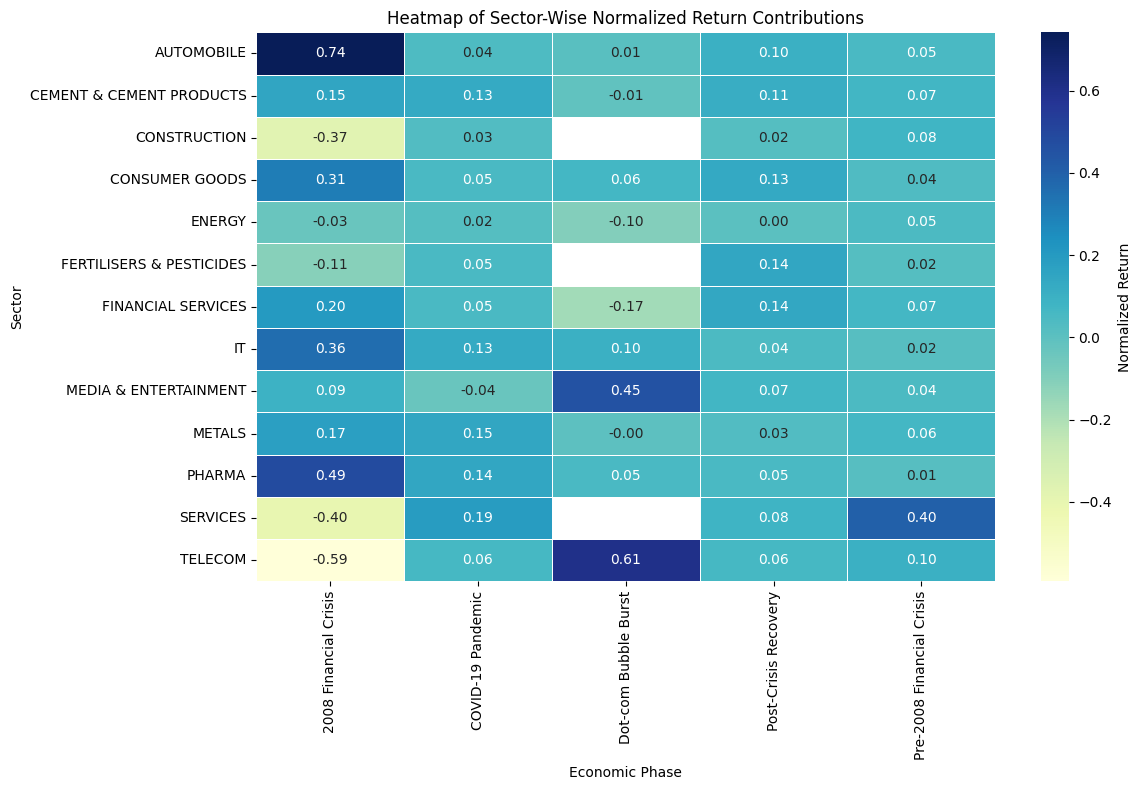

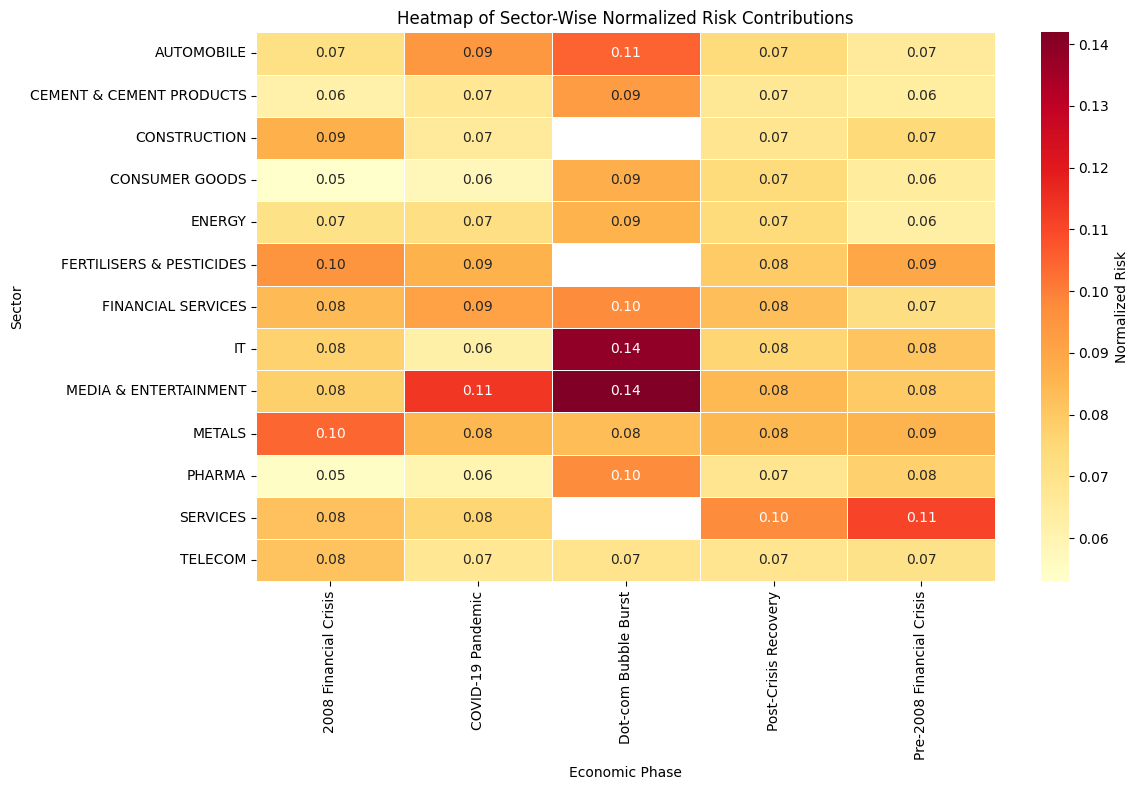

In [63]:
# Prepare data for the heatmap: Pivot data
heatmap_data_return = sector_analysis.pivot(index="Industry", columns="Phase", values="Normalized_Return")
heatmap_data_risk = sector_analysis.pivot(index="Industry", columns="Phase", values="Normalized_Risk")

# Plot heatmap for Normalized Return
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_return, 
    cmap="YlGnBu", 
    annot=True, 
    fmt=".2f", 
    linewidths=.5, 
    cbar_kws={'label': 'Normalized Return'}
)
plt.title("Heatmap of Sector-Wise Normalized Return Contributions")
plt.xlabel("Economic Phase")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

# Plot heatmap for Normalized Risk
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_risk, 
    cmap="YlOrRd", 
    annot=True, 
    fmt=".2f", 
    linewidths=.5, 
    cbar_kws={'label': 'Normalized Risk'}
)
plt.title("Heatmap of Sector-Wise Normalized Risk Contributions")
plt.xlabel("Economic Phase")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

Sharpe Ratio

In [59]:
# Define the risk-free rate (e.g., 3% annualized risk-free rate)
risk_free_rate = 3 / 252  # Convert annual rate to daily (252 trading days per year)

# Calculate Sharpe Ratio for each stock
data['Excess_Return'] = data['Return'] - risk_free_rate
data['Sharpe_Ratio'] = data.groupby('Symbol').apply(
    lambda x: x['Excess_Return'].mean() / x['Return'].std()
).reset_index(drop=True)

# Aggregate Sharpe Ratio by Sector
sector_sharpe = data.groupby('Industry').agg(
    Average_Sharpe=('Sharpe_Ratio', 'mean'),
    Return_Volatility=('Return', 'std')
).reset_index()

# Display the sector-wise Sharpe Ratios
sector_sharpe.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_9632\4079321406.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['Sharpe_Ratio'] = data.groupby('Symbol').apply(


,Industry,Average_Sharpe,Return_Volatility
0,AUTOMOBILE,NaN,2.678854
1,CEMENT & CEMENT PRODUCTS,NaN,2.371707
2,CONSTRUCTION,NaN,2.578731
3,CONSUMER GOODS,NaN,2.397231
4,ENERGY,NaN,2.494119


C:\Users\Dell\AppData\Local\Temp\ipykernel_9632\3064217869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


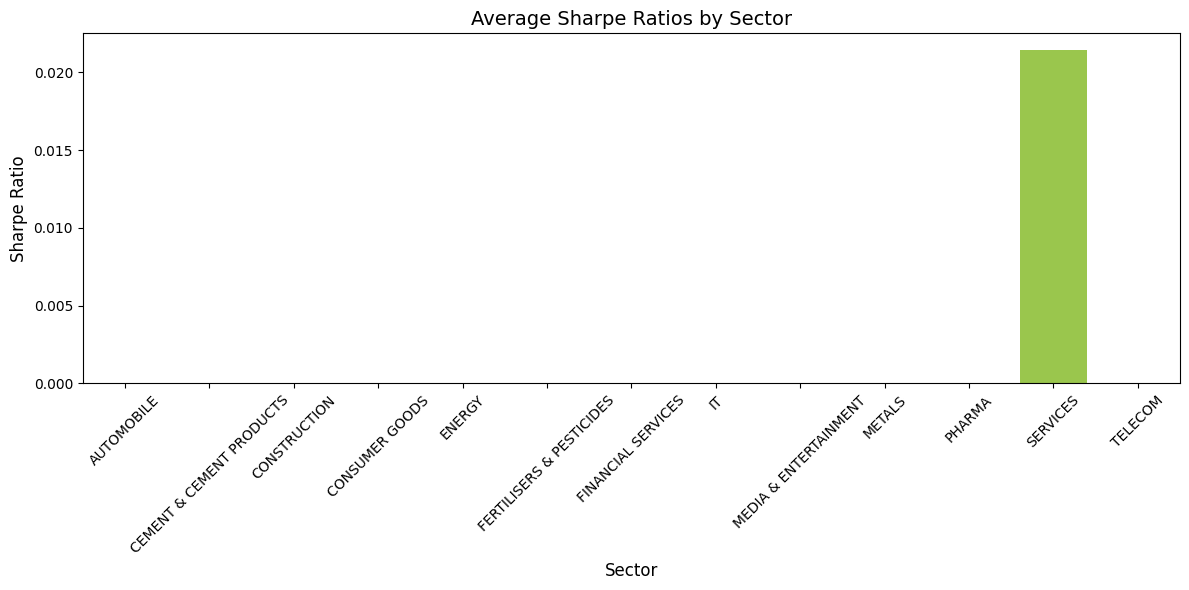

In [60]:
# Bar chart for Sharpe Ratios by Sector
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sector_sharpe,
    x='Industry',
    y='Average_Sharpe',
    palette='viridis'
)
plt.title("Average Sharpe Ratios by Sector", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Sharpe Ratio", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
# Define a placeholder for Sharpe Ratios by phase
phase_sharpe_ratios = []

# Loop through each economic phase
for phase, (start_date, end_date) in economic_phases.items():
    # Filter data for the current phase
    phase_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Calculate Sharpe Ratio for each sector in the current phase
    phase_sharpe = phase_data.groupby('Industry').apply(
        lambda x: (x['Return'].mean() - risk_free_rate) / x['Return'].std()
    ).reset_index(name='Sharpe_Ratio')
    
    # Add the phase information
    phase_sharpe['Phase'] = phase
    phase_sharpe_ratios.append(phase_sharpe)

# Combine results for all phases into a single DataFrame
phase_sharpe_ratios = pd.concat(phase_sharpe_ratios, ignore_index=True)

phase_sharpe_ratios.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_9632\3583815651.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  phase_sharpe = phase_data.groupby('Industry').apply(
C:\Users\Dell\AppData\Local\Temp\ipykernel_9632\3583815651.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  phase_sharpe = phase_data.groupby('Industry').apply(
C:\Users\Dell\AppData\Local\Temp\ipykernel_9632\3583815651.py:10: DeprecationWar

,Industry,Sharpe_Ratio,Phase
0,AUTOMOBILE,-0.004655,Dot-com Bubble Burst
1,CEMENT & CEMENT PRODUCTS,-0.002137,Dot-com Bubble Burst
2,CONSUMER GOODS,-0.013528,Dot-com Bubble Burst
3,ENERGY,0.011233,Dot-com Bubble Burst
4,FINANCIAL SERVICES,0.019512,Dot-com Bubble Burst


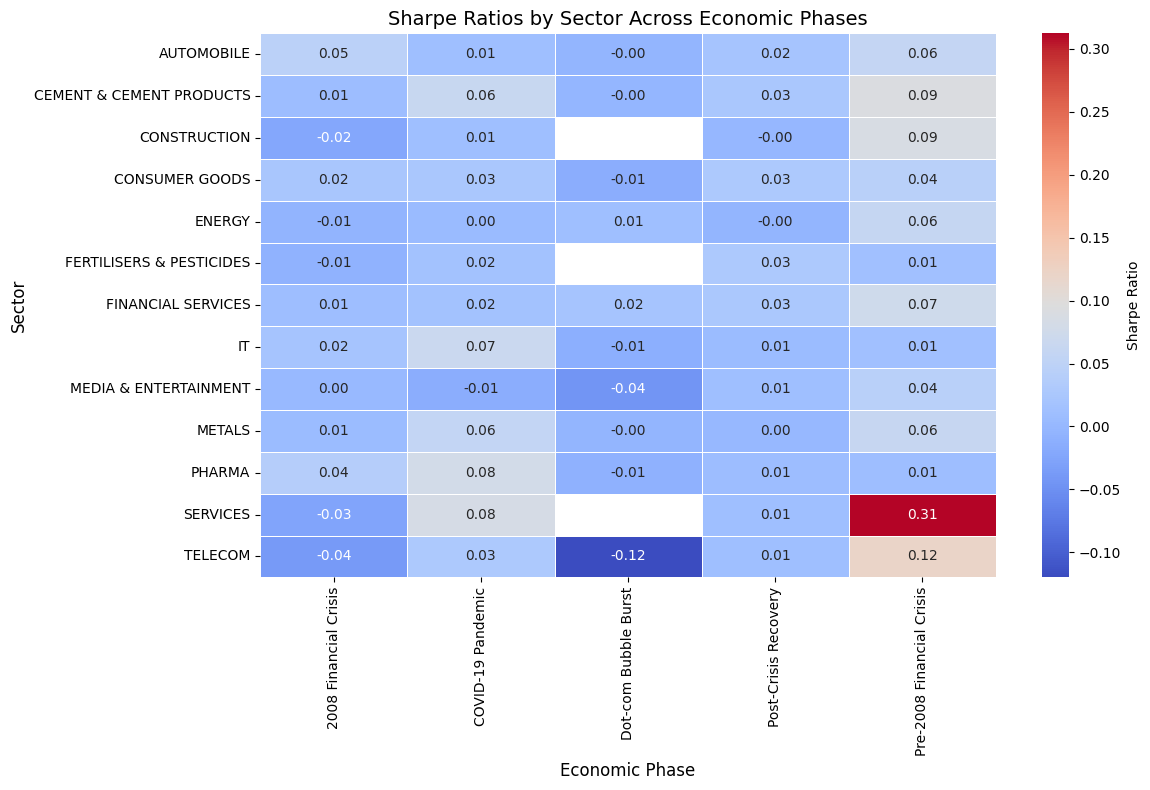

In [62]:
# Prepare data for the heatmap: Pivot data for Sharpe Ratios by phase
heatmap_data_sharpe = phase_sharpe_ratios.pivot(index = "Industry", columns = "Phase", values =  "Sharpe_Ratio")

# Plot heatmap for Sharpe Ratios
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_sharpe,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Sharpe Ratio'}
)
plt.title("Sharpe Ratios by Sector Across Economic Phases", fontsize=14)
plt.xlabel("Economic Phase", fontsize=12)
plt.ylabel("Sector", fontsize=12)
plt.tight_layout()
plt.show()

# Conclusion

Our project succesfully analyzed sector-wise and company-level performance across major economic phases (2000-2021) using Python for data cleaning, visualization, and insights. Sector-level analysis highlighted the resilience of Pharma and Consumer Goods during crises and the growth potential of Services, Metals, and Financial Services in recovery phases. These insights guide strategic investments across sectors and companies.